# The concepts Estimates of Location of Data

- Variables with measured or count data might have thousands of distinct values.
- A basic step in exploring your data is getting a “typical value” for each feature (variable):
    - an estimate of where most of the data is located (i.e., its central tendency).



## Key Terms for Estimates of Location
- **Mean**
    - The sum of all values divided by the number of values.
        - Synonym
            - average
- **Weighted mean**
    - The sum of all values times a weight divided by the sum of the weights.
        - Synonym
            - weighted average
- **Median**
    - The value such that one-half of the data lies above and below.
        - Synonym
            - 50th percentile
- **Percentile**
    - The value such that P percent of the data lies below.
        - Synonym
            - quantile
- **Weighted median**
    - The value such that one-half of the sum of the weight
- **Trimmed mean**
    - The average of all values after dropping a fixed number of extreme values.
        - Synonym
            - truncated mean
- **Robust**
    - Not sensitive to extreme values.
        - Synonym
            - resistant
- **Outlier**
    - A data value that is very different from most of the data.
        - Synonym
            - extreme value


> **Metrics and Estimates**\
**Statisticians** often use the term **estimate** for a value calculated from
the data at hand, to draw a distinction between what we see from
the data and the theoretical true or exact state of affairs. **Data scientists and business analysts** are more likely to refer to such a value as
a **metric**

In [2]:
# Import the important Statistical libraries 
import numpy as np # Fundamental package for numerical computing
import pandas as pd # For Data manipulation and analysis
from scipy import stats # For Advanced scientific computing and statistical analysis
import statsmodels.api as sm # For Statistical modeling and hypothesis testing
import seaborn as sns # For Data visualization for understanding statistical distributions
import matplotlib.pyplot as plt # For Data visualization for understanding statistical distributions
import plotly as plt # For Data visualization for understanding statistical distributions

In [3]:
# Load the US Health Insurance Dataset downlaoded from Kaggle
df = pd.read_csv ('./data_sets/insurance.csv')

### `pd.head()` is used to display the first few rows of a DataFrame in pandas. By default, it shows the first 5 rows, but you can specify the number of rows to display by passing an integer as an argument.

In [4]:
# To display the first few rows of dataset
df.head()
# To display the required rows 
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


`pd.info()` is used to display a concise summary of a DataFrame in pandas. This summary includes the number of non-null entries, the data type of each column, and the memory usage of the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`pd.describe()` is used to generate descriptive statistics of a DataFrame in pandas. It provides a summary of the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. By default, it includes statistics like count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max for numerical columns.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 01 **Mean**
### 1.1 Mean
- The mean is the sum of all values divided by the number of values.

In [7]:
# Mean of charges with Numpy Library
np.mean(df['charges'])

13270.422265141257

In [8]:
# Mean with pandas library
df['charges'].mean()

13270.422265141257

In [9]:
# Mean with Scipy library
stats.tmean(df['charges'])

13270.422265141257

In [10]:
# Mean with statsmodel library

# Create a DescrStatsW object
desc_stats = sm.stats.DescrStatsW(df['charges'])

# Calculate the mean
mean_charges = desc_stats.mean

print("Mean age:", mean_charges)

Mean age: 13270.422265141258


<Axes: xlabel='charges', ylabel='Count'>

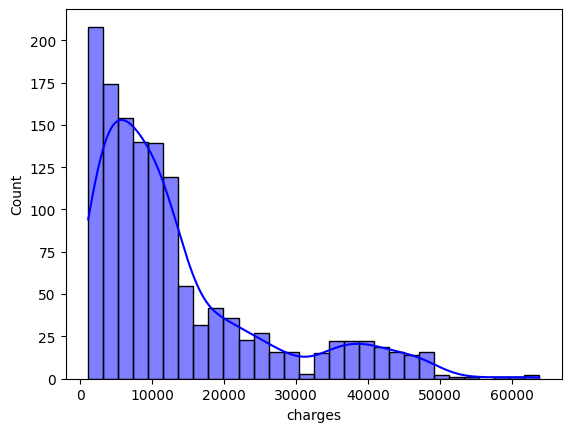

In [11]:
# Visualize the Mean with seaborn
sns.histplot(df['charges'], kde=True, color='blue')

In [12]:
# Mean with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df, x='charges', nbins=50, title='Distribution of Charges')
fig.add_vline(x=df['charges'].mean(), line=dict(color='red'), name='Mean')
fig.show()

### 1.2 Trimmed Mean
- A variation of the mean which calculate the mean by dropping a fixed number of sorted values at each end and then taking an average of the remaining values
- A trimmed mean eliminates the influence of extreme values
- The trimmed mean is a robust measure of central tendency, as it is less affected by outliers than the mean
- The trimmed mean is calculated by first sorting the data in ascending order, then dropping a fixed number
- For example, in international diving the top score and bottom score from five judges are dropped, and the final score is the average of the scores from the three remaining judges. This makes it difficult for a single judge to manipulate the score, perhaps to favor their country’s
contestant.
- Trimmed means are widely used, and in many cases are preferable to
using the ordinary mean


In [13]:
# import the library for trim mean
from scipy.stats import trim_mean
# Calculate the trimmed mean, trimming 10% from each end
trimmed_mean_charges = trim_mean(df['charges'], proportiontocut=0.1)
print("Trimmed mean charges:", trimmed_mean_charges)

Trimmed mean charges: 11076.019520008396


In [14]:
# Visualize the trimmed mean with plotly
fig = px.histogram(df, x='charges', nbins=50, title='Distribution of Charges')
fig.add_vline(x=trimmed_mean_charges, line=dict(color='red'), name='Trimmed Mean')
fig.show()


In [15]:
# Print mean  and trimmed on a single plot to see the differnce and also print the legends
fig = px.histogram(df, x='charges', nbins=50, title='Distribution of Charges')
fig.add_vline(x=df['charges'].mean(), line=dict(color='red'), name='Mean')
fig.add_vline(x=trimmed_mean_charges, line=dict(color='green'), name='Trimmed Mean')
fig.show()

### 1.3 **Weighted Mean**
- A type of mean is a weighted mean, which you calculate by multiplying each data value xi by a user-specified weight wi and dividing their sum by the sum of the weights
- There are two main motivations for using a weighted mean:
    - Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.
    - The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.


## 02 **Median and Robust Estimates**
- The median is a robust measure of central tendency that is less affected by outliers than the mean.
- If there is an even number of data values, the middle value is one that is not actually in the data set, but rather the average of the two values that divide the sorted data into upper and lower halves
- Compared to the mean, which uses all observations, the median depends only on the values in the center of the sorted data set. 
- This makes the median more resistant to the influence of outliers.
- this might seem to be a disadvantage, since the mean is much more    sensitive to the data, there are many instances in which the median is a better metric for location


In [16]:
# Caculate and print the Medain with Numpy, Pandas and Statsmodel libraries than plot it
# Extract the charges column
charges = df['charges']

# Calculate the median using NumPy
median_numpy = np.median(charges)

# Calculate the median using Pandas
median_pandas = charges.median()

# Calculate the median using Statsmodels
desc_stats = sm.stats.DescrStatsW(charges)
median_statsmodels = desc_stats.quantile(0.5)

# Print the medians
print("Median using NumPy:", median_numpy)
print("Median using Pandas:", median_pandas)
print("Median using Statsmodels:", median_statsmodels)

# Plot the distribution and add vertical lines for the medians
fig = px.histogram(df, x='charges', nbins=50, title='Distribution of Charges')

# Add vertical lines for the medians
fig.add_shape(
    type="line",
    x0=median_numpy,
    y0=0,
    x1=median_numpy,
    y1=1,
    line=dict(color="red", width=2),
    xref="x",
    yref="paper",
    name="Median (NumPy)"
)

fig.add_shape(
    type="line",
    x0=median_pandas,
    y0=0,
    x1=median_pandas,
    y1=1,
    line=dict(color="green", width=2),
    xref="x",
    yref="paper",
    name="Median (Pandas)"
)

fig.add_shape(
    type="line",
    x0=median_statsmodels,
    y0=0,
    x1=median_statsmodels,
    y1=1,
    line=dict(color="blue", width=2),
    xref="x",
    yref="paper",
    name="Median (Statsmodels)"
)

# Add legend manually
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',
    line=dict(color='red', width=2),
    name='Median (NumPy)'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',
    line=dict(color='green', width=2),
    name='Median (Pandas)'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Median (Statsmodels)'
))

fig.show()

Median using NumPy: 9382.033
Median using Pandas: 9382.033
Median using Statsmodels: p
0.5    9382.033
dtype: float64


### 2.1 **Weighted Median**
- As with the median, we first sort the data, although each data value
has an associated weight. Instead of the middle number, the weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. Like the median, the weighted median is robust to outliers.
- The weighted median is a good choice when the data are skewed and the median is a better representation of the data than the mean. 
- It is also a good choice when the data are not normally distributed


In [17]:
# Calculate the Weighted Median

values = df['charges']

# Check if 'weights' column exists, if not create it with equal weights
if 'weights' not in df.columns:
    df['weights'] = 1

weights = df['weights']

# Sort the values and weights by the values
sorted_indices = np.argsort(values)
sorted_values = values.iloc[sorted_indices]
sorted_weights = weights.iloc[sorted_indices]

# Compute the cumulative weights
cumulative_weights = np.cumsum(sorted_weights)

# Find the point where the cumulative weight is equal to or exceeds half of the total weight
half_total_weight = cumulative_weights.iloc[-1] / 2
weighted_median_index = np.where(cumulative_weights >= half_total_weight)[0][0]
weighted_median = sorted_values.iloc[weighted_median_index]

print("Weighted Median:", weighted_median)

Weighted Median: 9377.9047


In [18]:
# Plot the comparsion of Median and Weighted Median

# median_pandas and weighted_median are already calculated

# Plot the distribution and add vertical lines for the median and weighted median
fig = px.histogram(df, x='charges', nbins=50, title='Distribution of Charges')

# Add vertical lines for the median and weighted median
fig.add_shape(
    type="line",
    x0=median_pandas,
    y0=0,
    x1=median_pandas,
    y1=1,
    line=dict(color="red", width=2),
    xref="x",
    yref="paper"
)

fig.add_shape(
    type="line",
    x0=weighted_median,
    y0=0,
    x1=weighted_median,
    y1=1,
    line=dict(color="green", width=2),
    xref="x",
    yref="paper"
)

# Add legend manually
fig.add_trace(go.Scatter(
    x=[median_pandas, median_pandas],
    y=[0, max(df['charges'])],
    mode='lines',
    line=dict(color='red', width=2),
    name='Median'
))

fig.add_trace(go.Scatter(
    x=[weighted_median, weighted_median],
    y=[0, max(df['charges'])],
    mode='lines',
    line=dict(color='green', width=2),
    name='Weighted Median'
))

fig.show()

## **Outliers**
- outliers (extreme cases) could skew the results
- An outlier is any value that is very distant from the other values in a data set
- The exact definition of an outlier is somewhat subjective
- Outliers can be either high or low values
- Being an outlier in itself does not make a data value invalid or erroneous
- outliers are often the result of data errors such as mixing data of different units (kilometers versus meters) or bad readings from a sensor.
- When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid
- In any case, outliers should be identified and are usually
worthy of further investigation.

> **Anomaly Detection**\
In contrast to typical data analysis, where outliers are sometimes informative and sometimes a nuisance, in anomaly detection the points of interest are the outliers, and the greater mass of data serves primarily to define the “normal” against which anomalies are measured.


### The **median** is not the only robust estimate of location. In fact, a **trimmed mean** is widely used to avoid the influence of outliers. For example, trimming the bottom and top 10% (a common choice) of the data will provide protection against outliers in all but the smallest data sets. The **trimmed mean** can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location.

> Weighted mean is available with NumPy. For weighted median, we can use the specialized package wquantiles

### **Key Ideas**
- The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust